In [36]:
import pandas as pd

In [37]:
import numpy as np

In [38]:
import matplotlib.pyplot as plt

In [40]:
import seaborn as sns

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [43]:
from sklearn import metrics

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [45]:
from sklearn.metrics import silhouette_score

In [46]:
from scipy.cluster.hierarchy import cophenet

In [47]:
from scipy.spatial.distance import pdist

In [48]:
import warnings

In [49]:
warnings.filterwarnings('ignore')

In [55]:
dataset = pd.read_csv('./Algoritmosdeaprendizaje.csv')
dataset.head()

,IDcliente,sexo,edad,ingreso anual(k$),Puntajedegasto (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
dataset.shape

(200, 5)

In [59]:
data=dataset.drop(['sexo'], axis=1)
data.head()

,IDcliente,edad,ingreso anual(k$),Puntajedegasto (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [60]:
data.describe()

,IDcliente,edad,ingreso anual(k$),Puntajedegasto (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [61]:
data.isna().sum()

IDcliente                 0
edad                      0
ingreso anual(k$)         0
Puntajedegasto (1-100)    0
dtype: int64

In [62]:
data.dropna()

,IDcliente,edad,ingreso anual(k$),Puntajedegasto (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


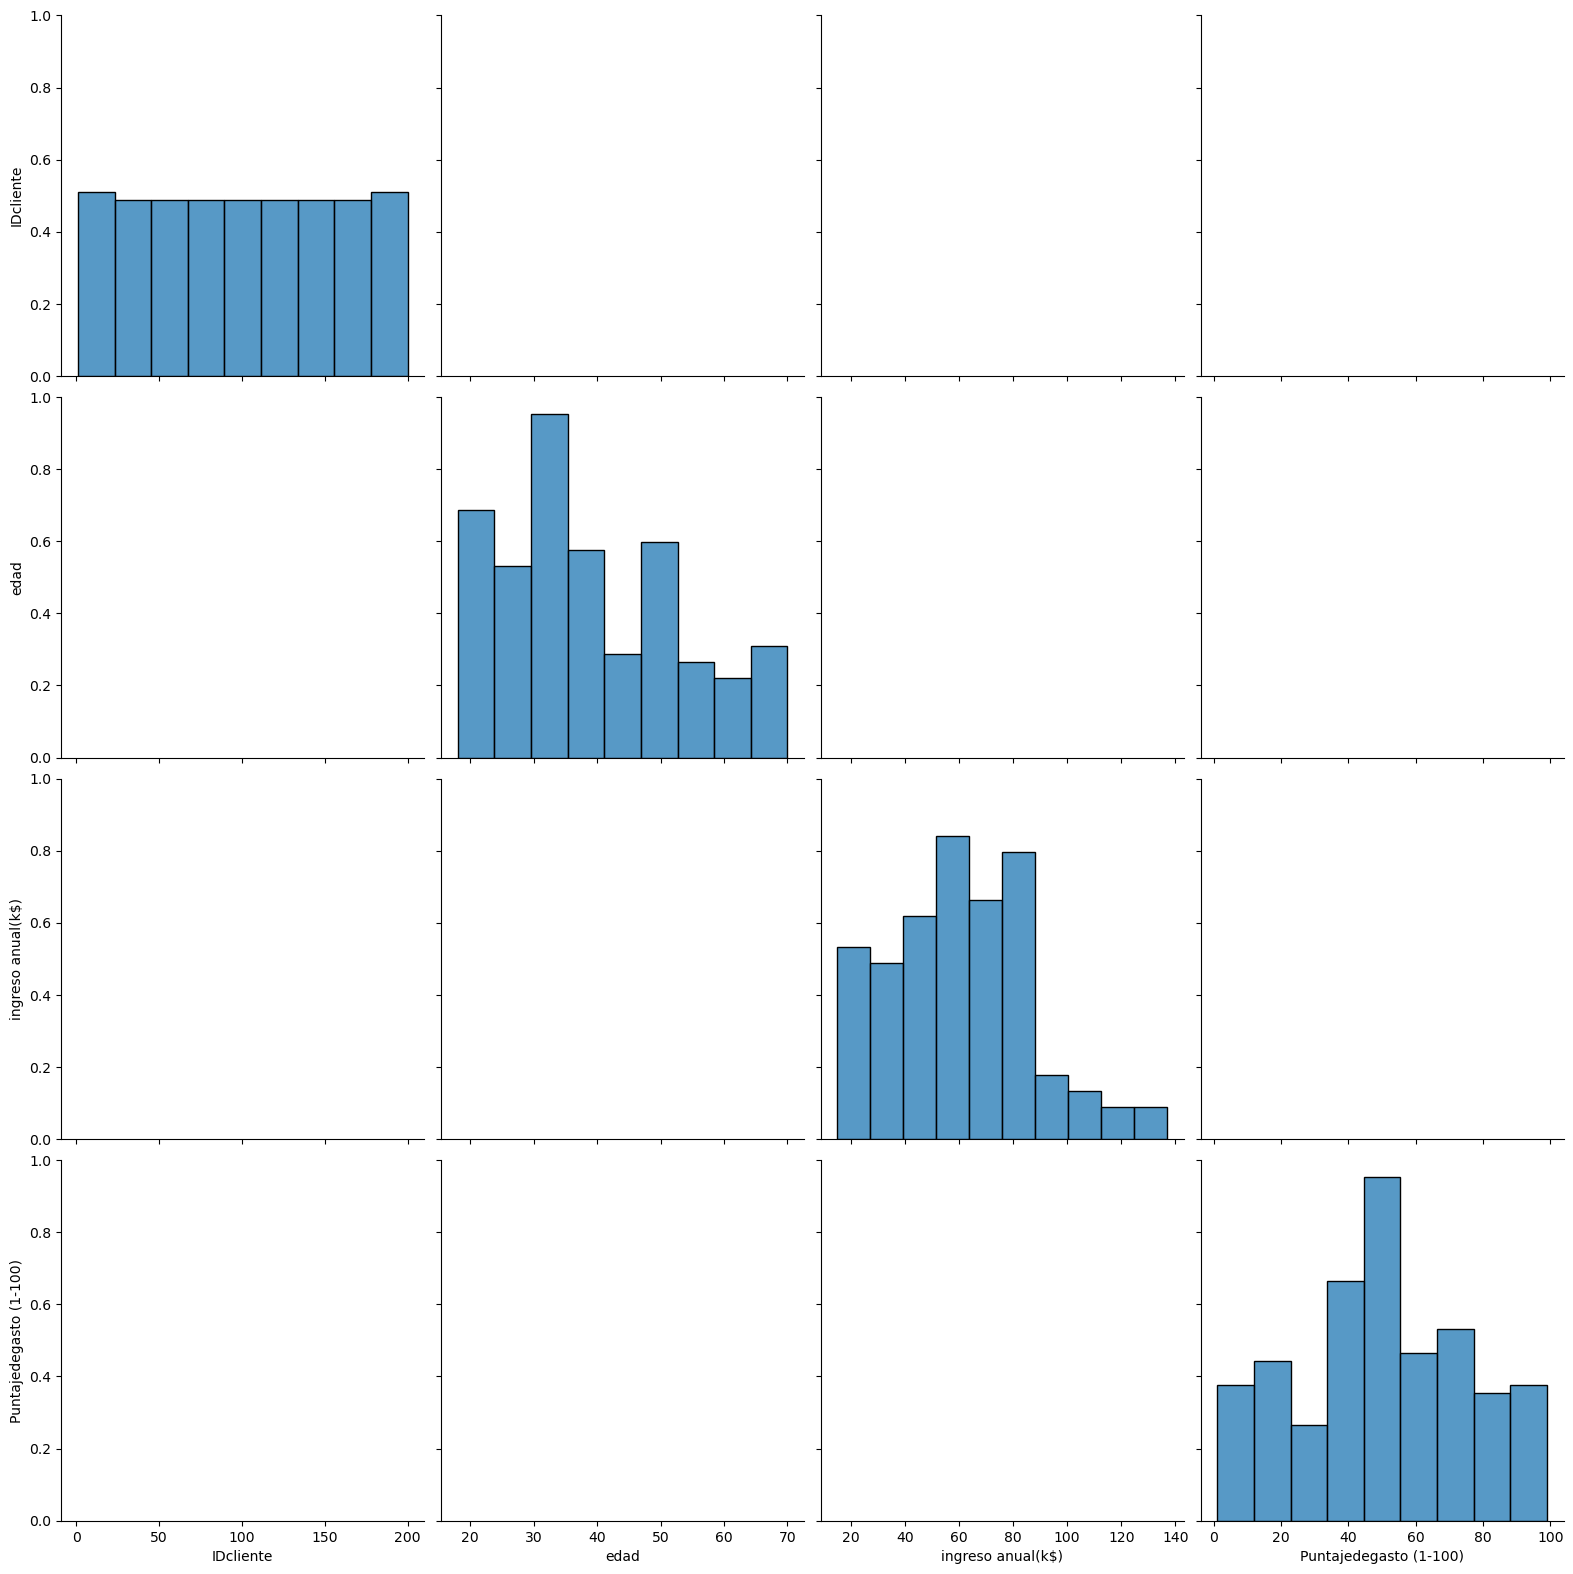

In [63]:
sns.pairplot(data.dropna(), size=4,kind='ingreso anual(k$)')

In [64]:
corr_matrix = data.corr()
corr_matrix

,IDcliente,edad,ingreso anual(k$),Puntajedegasto (1-100)
IDcliente,1.000000,-0.026763,0.977548,0.013835
edad,-0.026763,1.000000,-0.012398,-0.327227
ingreso anual(k$),0.977548,-0.012398,1.000000,0.009903
Puntajedegasto (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

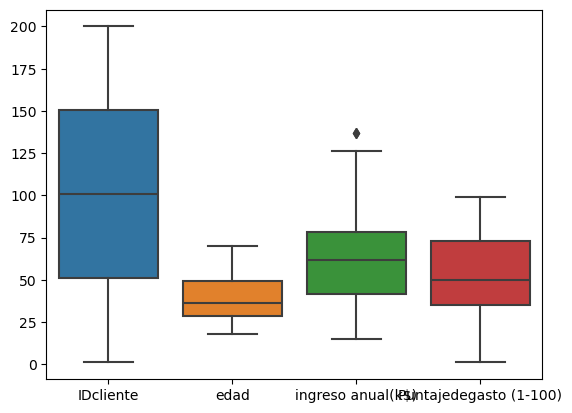

In [65]:
sns.boxplot(data=data)

In [66]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,IDcliente,edad,ingreso anual(k$),Puntajedegasto (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


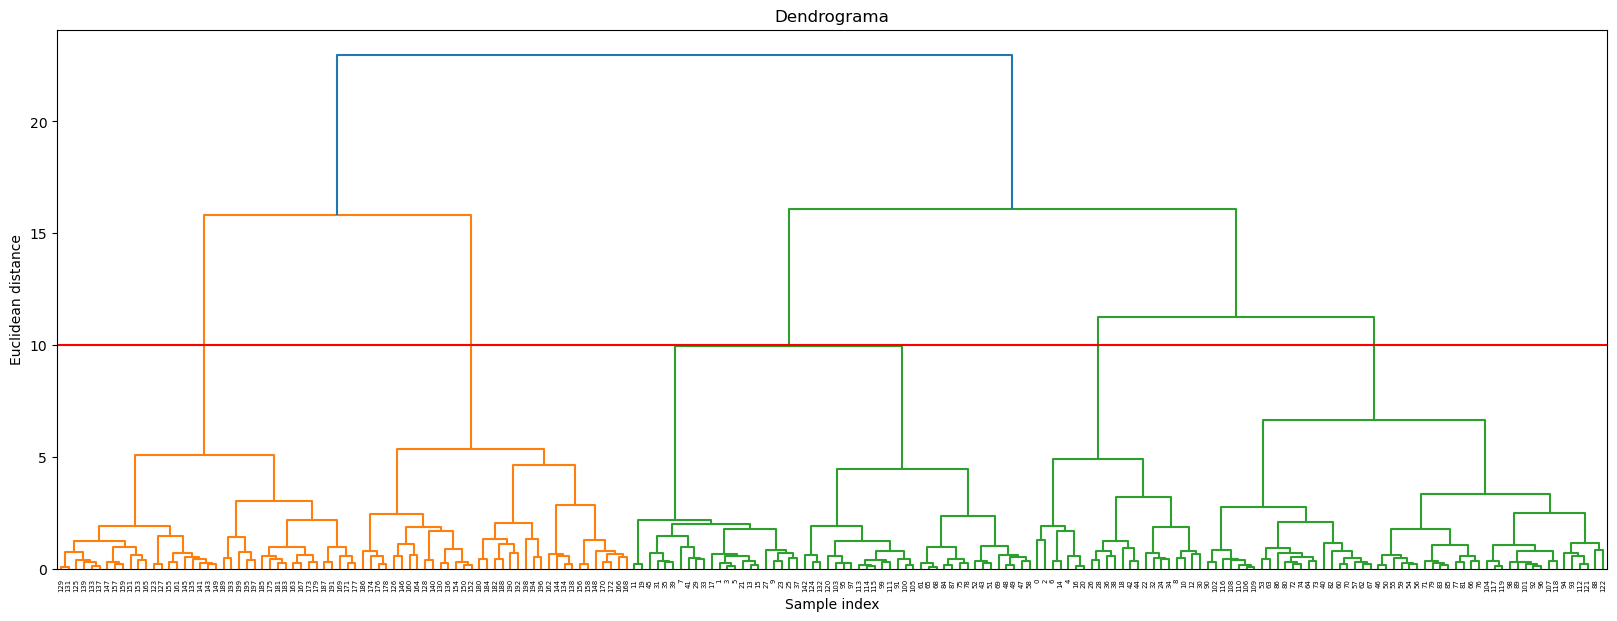

In [76]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [68]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [69]:
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

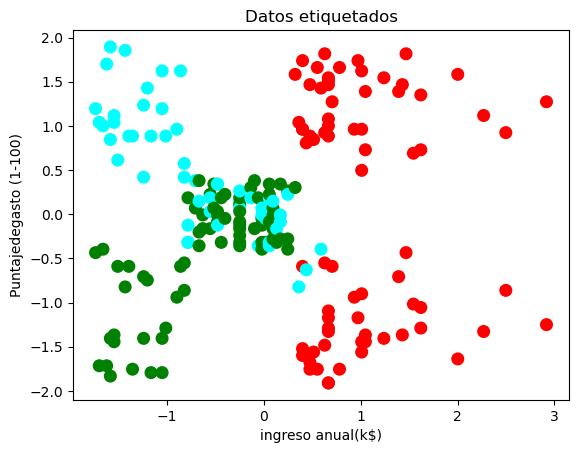

In [70]:
f1 = X['ingreso anual(k$)'].values
f2 = X['Puntajedegasto (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('ingreso anual(k$)')
plt.ylabel('Puntajedegasto (1-100)')
plt.show()

In [71]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

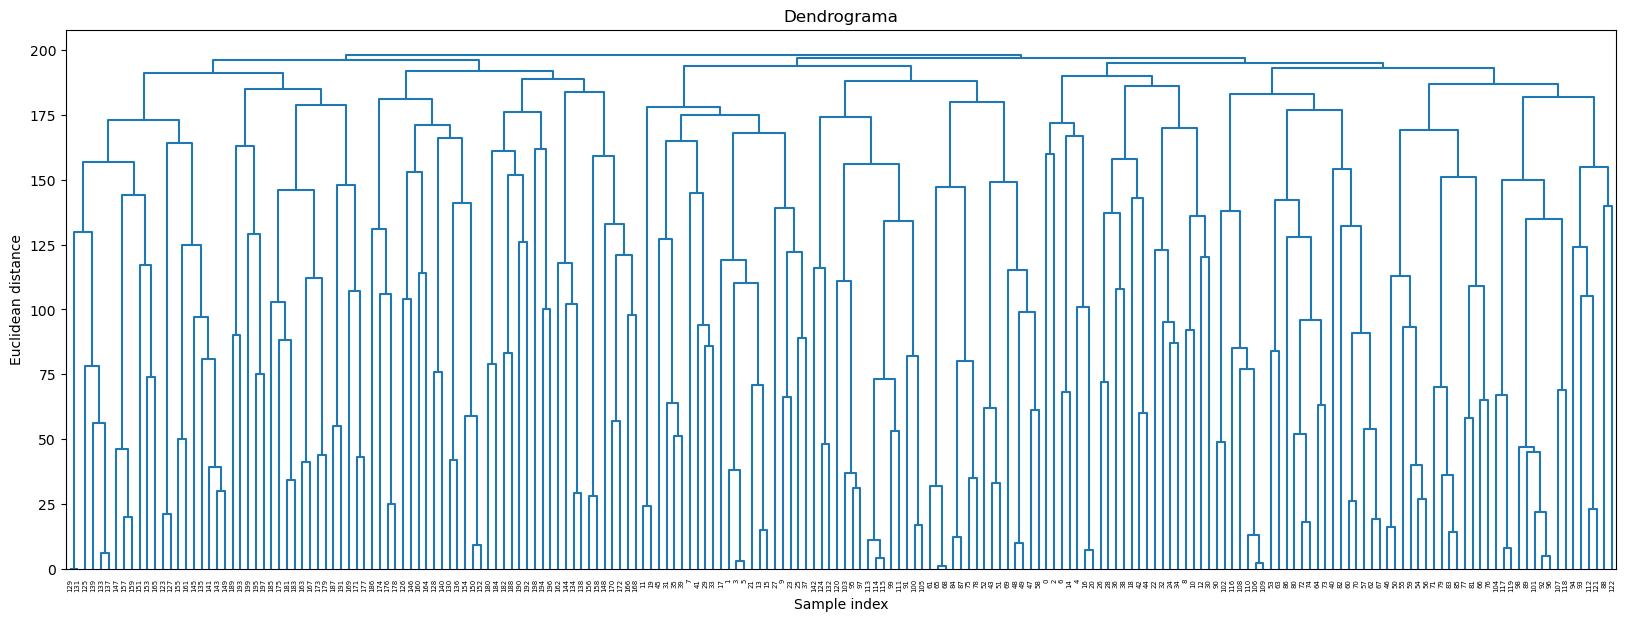

In [72]:
plot_dendrogram(hier_clustering, color_threshold=0)

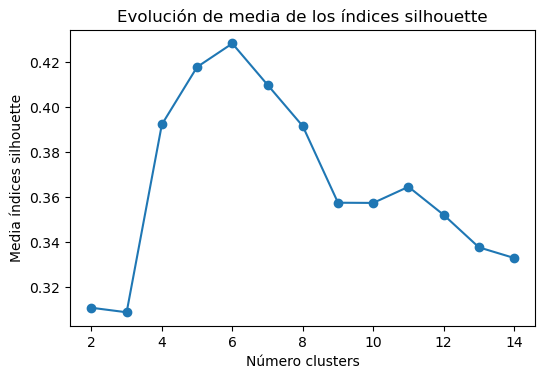

In [73]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [74]:
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.3087474067915757
Índice de Calinski-Harabasz: 94.85428751941517
Davies-Bouldin Index: 1.1302868682321934


In [75]:
from scipy.cluster.hierarchy import linkage
X_dist = pdist(X)
Z = linkage(X, 'ward')
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.644982688580315, array([16.06037879,  1.28415501, 16.06037879, ..., 15.79117249,
        0.74388365, 15.79117249]))
